In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

## Hierarchical Clustering (Agglomerative)

In [2]:
### Continued Example: App Usage Data

age = [20, 22, 24, 24, 25, 28, 29, 34, 36, 38, 39, 41, 42, 44, 56, 57, 61, 62, 63, 63]
hours = [12, 10, 11.2, 12.3, 12.4, 13.5, 14, 8, 7, 6, 7.2, 5.6, 6.7, 6.2, 5, 4.2, 3, 2, 1]
df = pd.DataFrame(zip(age, hours), columns = ['age', 'hours'])
df.head()

,age,hours
0,20,12.0
1,22,10.0
2,24,11.2
3,24,12.3
4,25,12.4


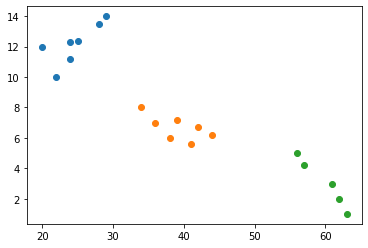

In [3]:
from sklearn.cluster import AgglomerativeClustering
# defualt for number of cluster is 2 
model = AgglomerativeClustering(n_clusters=3)
# we can make n_cluster=None, distance_threshold=6

# fit model and predict clusters
df['clusters'] = model.fit_predict(df)
# create scatter plot for samples from each cluster

clusterval = df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(df[df['clusters']==cluster]['age'], df[df['clusters']==cluster]['hours'])
plt.show()

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
#help(dendrogram)
#help(linkage)

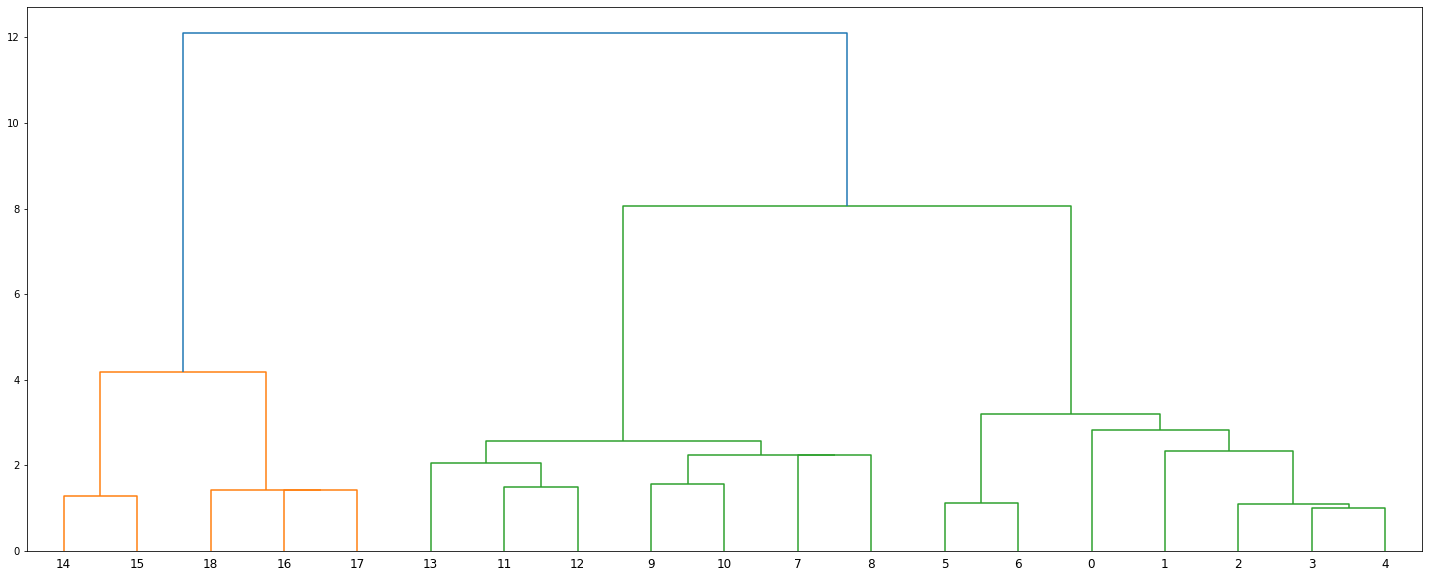

In [5]:
Z = linkage(df)
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()
# y axis show the eqqlidian distance 

Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

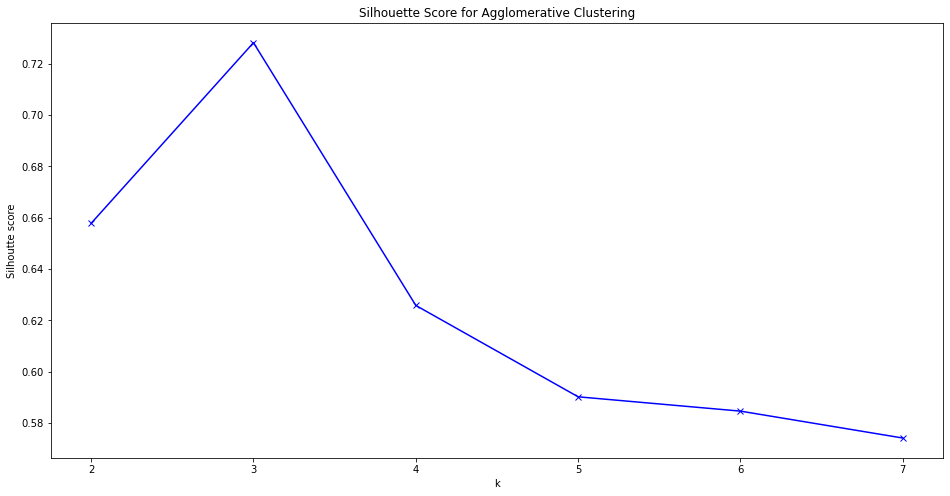

In [6]:
K = range(2, 8)
silhouette = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(df)
    silhouette.append(silhouette_score(df, model.fit_predict(df)))
# silhoutte score measure how far are seperate cluster apart
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhoutte score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')
# the optimum number of cluster would be 3 (spike is 3).

## Example with generated data

In [7]:
# generates data good for classification with mean 0 and std dev=1.
from sklearn.datasets import make_classification
#help(make_classification)

In [8]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

pd.DataFrame(X).describe()

,0,1
count,1000.000000,1000.000000
mean,-0.000778,-0.971083
std,1.157922,1.109568
min,-2.933792,-4.887411
25%,-1.041307,-1.686809
50%,0.163985,-0.986916
75%,1.015676,-0.258486
max,2.350330,3.981227


## K-Means

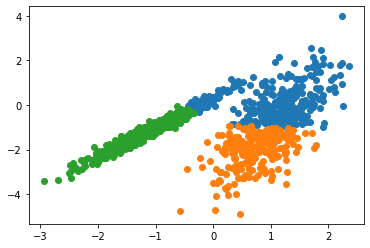

In [9]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state = 123)
model.fit(X)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

Text(0.5, 1.0, 'Silhouette Score for KMeans')

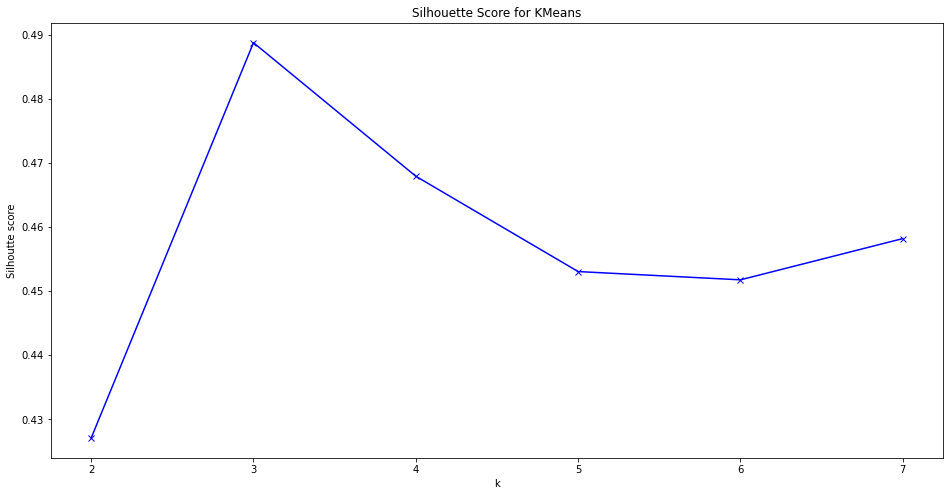

In [10]:
K = range(2, 8)
silhouette_kmeans = []

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    silhouette_kmeans.append(silhouette_score(X, model.fit_predict(X)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_kmeans, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhoutte score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for KMeans')

## Hierarchical Clustering (Agglomerative)

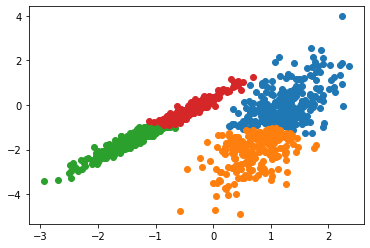

In [11]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

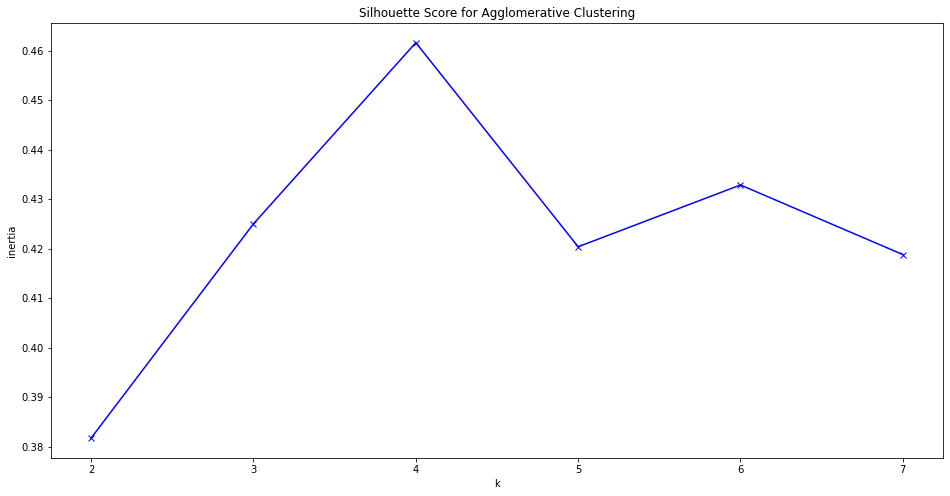

In [12]:
K = range(2, 8)
silhouette_hc = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X)
    silhouette_hc.append(silhouette_score(X, model.fit_predict(X)))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_hc, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

## DBSCAN

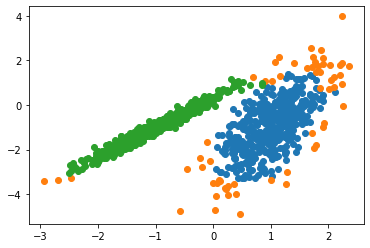

In [13]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=10)#esp=0.3 means max distance which is okay to be between two clusters

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

In [14]:
# the orange dots are noises because they are not close enough to other clusters.
#

{0, 1, 2, 3, 4, 5, 6, -1}
{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
{0, 1, 2, 3, -1}
{0, 1, 2, -1}
{0, 1, 2, -1}
{0, 1, -1}
{0, -1}
{0, -1}
[0.1, 0.12, 0.15, 0.18, 0.2, 0.3, 0.4, 0.5]
[8, 10, 5, 4, 4, 3, 2, 2]
[-0.23929205731297043, -0.07744654039359893, 0.07019751684012232, 0.2650853608731569, 0.25643691416479014, 0.4157241178607082, 0.4613474365032591, 0.4831114571736628]


Text(0.5, 1.0, 'Silhouette Score for DBSCAN')

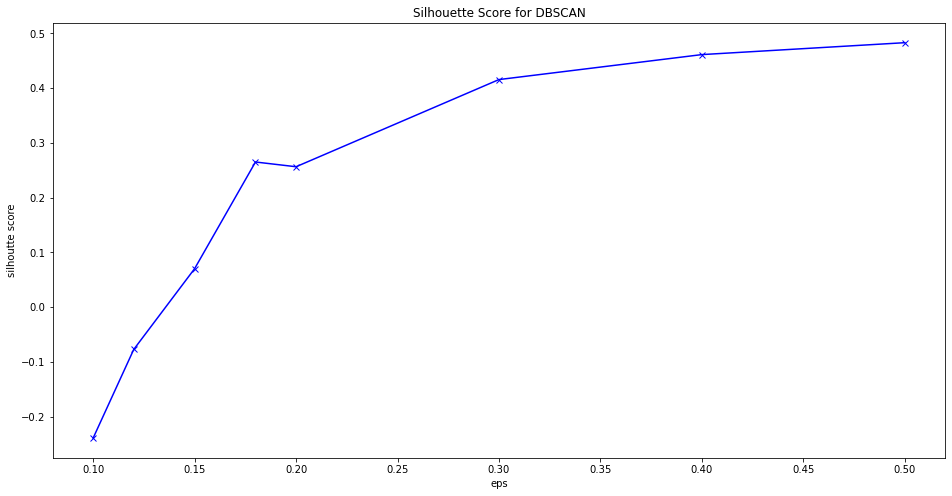

In [23]:

eps_vector=[0.1, 0.12, 0.15, 0.18, 0.2, 0.3, 0.4, 0.5]
silhouette_dbs = []
n_clusters = []

for e in eps_vector:
    model = DBSCAN(eps = e, min_samples=10)
    clusters=set(model.fit_predict(X))
    n_clusters.append(len(clusters))
    print(clusters)
    model.fit(X)
    silhouette_dbs.append(silhouette_score(X, model.fit_predict(X)))

print(eps_vector)
print(n_clusters)
print(silhouette_dbs)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(eps_vector, silhouette_dbs, 'bx-')
plt.xlabel('eps')
plt.ylabel('silhoutte score')
plt.title('Silhouette Score for DBSCAN')

In [ ]:
# negative silhoute score means bad, they are bad, the higher&positive is better

## Evaluating Unsupervised Learning Algorithms

In most cases, we do not have a source of truth!

In [24]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(X)
print(silhouette_score(X, clusters))

0.45303338914344127


In [25]:
model = AgglomerativeClustering(n_clusters=5)
clusters = model.fit_predict(X)
print(silhouette_score(X, clusters))

0.42037434920081196


In [26]:
model = DBSCAN(eps = 0.2, min_samples=10)
clusters = model.fit_predict(X)
print(silhouette_score(X, clusters))

0.25643691416479014


### PCA